# PREMIER LEAGUE CLUB INVESTMENT ANALYSIS FOR AN INVESTMENT COMPANY (EDA)

## DOMAIN: SPORTS

### Context:

A renowed investment firm usually inveest in top-tier sports teams that have potential. The dataset in their possession comprises crucial information about all the clubs that have participated in premier league (assume that it has the data for all the clubs). It includes data on the number of goals scored, the number of times they have finished in the top two positions and other relevent details.

#### Data:
Premier league final data csv- The data set contains information on all the clubs so far participated in all the premier league tournaments.

#### Data dictionary:

* Club: Name of the football club

* Matches: Number of matches the club has played in the premier league

* Wins: Number of matches won by the club in the premier league

* Loss: Number of matches lost by the club in the premier league

* Draws: Number of matches drawn by the club in the premier league

* Cleansheets: Number of matches in which the club has prevented the opposing sides from scoring

* Team launch: year in which the club was founded

* Winners: Number of times the club has won the Premier league

* Runners-up: Number of times the club has finished as runners-up in the premier league

* Last-played_pl: Year in which the team last played in the premier league

#### Project Objective

The management of the firm aims to invest in one of the top- performing club in the English Premier league. To aid in their decision-making process, the analytics department has been tasked with creating a comprehensive report on the performance of various clubs. However, some of the more established clubs have already been owned by the competitors. As a result, the firm wishes to identify the clubs they can approach and potentially invest to ensure a succesful and profitable deal.

### Note:
-Dataset has been downloaded from the internet using multiple sources. All the credit for the dataset goes to the original creator of the data.

## PROCESS OF ANALYSIS

 * **DATA CLEANING**- The process of identifying and correcting or removing errors, inconsistencies and inaccuracies in a dataset.

* **PRIMARY ANALYSIS**- This involves Descriptive analysis which is examining the data and noting any notable findings, anomalies or areas of interest.

* **EXPLORATORY DATA ANALYSIS**- The Goal of EDA is to uncover insights and trends that can help inform further analysis or decision making. It is often the first step in any data analysis project, as it provides a foundation for more advanced statistical methods and models.

* **INTERPRETATION**- The interpretation of data helps researchers to categorize, manipulate and summarize the observations in order to get conclusions.

### Let's understand the data!!

In [3]:
# import data for data cleaning and data analysis

import numpy as np
import pandas as pd

In [5]:
# import dataset
df = pd.read_csv(r"C:\Users\komal\Downloads\Premier_League_Final_Data_batch2.csv")

In [6]:
# Let's see the snapshot of our data
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


Here's the dataset of the football clubs. Clearly, We have 11 columns where 1st column has the names of the clubs and other columns with the information about their performances in the premier league. We need to clean the data as we can see, There are serial numbers attached to the names of the clubs and also null values in the Runners-up coulumn. 
Let's get another detailed view!

In [7]:
# Let's see the last 5 rows 
df.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


Here, We clearly observe that there are some inconsistencies in the Teamlaunch column. Some clubs are mentioning only Year where few of them mentioned both month and year. This may cause error in the analysis. And Winners column also has null values. We need to deal with them!!

In [8]:
# Let us check the size of the dataset
df.shape

(40, 11)

Hey!! There are 40 rows and 11 columns in the dataset

In [9]:
# Let us see a detailed information on our dataset including the values in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


Thats's good to see that most of the columns have 40 non-null values. However, Winners and Runners-up columns are having only 25 and 22 non-null values which means there are few null values. And also, the data type of Runners-up is object which is not numeric. This makes it difficult to perform analysis on these values. So, we need to convert the data type.

### Data Cleaning

As we have seen a lot of inconsistensies in the data, It is now time to clean it!

In [11]:
# Let's start with Club column

df['Club'] = df['Club'].str.replace('\d+','',regex = True)
df.head()

#In this code, '\d+' is a regular expression pattern that matches one or more digits at the start of the string. 
#The str.replace() method replaces this pattern with an empty string 
#effectively removing the numbers from the front of each team name in the "Club" column.

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


Now, Club column is cleaned and ready for further analysis

In [13]:
# Let's check the winners and Runners-up column

df['Winners'].value_counts()

Winners
0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: count, dtype: int64

**Winners column**

If we observe the winners column there are 18 clubs who never won any tournament, 3 clubs won one tournament, 1 club won three tournaments, 1 club won five tournaments, 1 club won six tournaments and another club won totally thirteen tournaments.
This dataset contains information of 30 tournaments and If we count, all the values are equal to 30 which means the null value in the column must be 0. That means, the clubs with null values won no tournaments in Premier League.


In [14]:
df['Runners-up'].value_counts()

Runners-up
0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: count, dtype: int64

**Runners-up column**


If we observe the values in runners-up column, It contains "-" as a value. Here, 3 clubs finished as runners-up 1 time, another 6 times, another 4 times, another 5 times, another 3 times, another 7 times and another 2 times. similar to winners, This column also contains the data of 30 tournaments. That concludes that all the null values as well as "-" values must be 0.

In [15]:
# filling the null columns with zero
df['Winners'].fillna(0, inplace=True)

# .fillna(0, inplace=True) This is a method in pandas that is used to fill missing (null) values in a Series or DataFrame. 
# In this case, it is applied to the "Winners" column of the DataFrame df to fill any null values with the value 0.

# Check for null values in the "Winners" column after data cleaning
df["Winners"].isnull().any()

df['Runners-up'].fillna(0,inplace=True)
df['Runners-up'].replace('-',0,inplace=True)

# Also we have seen it earlier that 'Runners-up' column is "Object" type let us convert it into int type
df['Runners-up'] = pd.to_numeric(df['Runners-up'], errors='coerce')
df['Runners-up'] = df['Runners-up'].astype('Int64')

# pd.to_numeric() function to attempt to convert the "Runners-up" column to a numeric data type. 
#The errors='coerce' argument tells the function to replace any values that cannot be converted to a number with NaN.

#The .astype() method to convert the "Runners-up" column to an "Int64" data type. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     Int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 3.6+ KB


In [16]:
# Now, Let's clean the TeamLaunch coloumn

# convert the column to datetime format
df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'],format= 'mixed',errors='coerce')

# convert the column to YYYY format
df['TeamLaunch'] = df['TeamLaunch'].dt.strftime('%Y')

The first line of code converts the column 'column_name' to datetime format using the pandas to_datetime() function. The 'errors' parameter is set to 'coerce', which means that any invalid dates will be set to NaT (Not a Time) in the resulting datetime column.

The second line of code uses the dt.strftime() method to convert the datetime column to a string column with only the year values. '%Y' is the format code for the year. This line of code will create a new column 'column_name' in the format YYYY.

In [24]:
# Let's check the Teamlaunch column after datacleaning
df['TeamLaunch'].value_counts()

TeamLaunch
1878    4
1886    2
1905    2
1874    2
1892    2
1879    2
1884    2
1882    2
1875    2
1895    1
1881    1
1889    1
1932    1
1912    1
1877    1
1863    1
1885    1
1867    1
1894    1
1904    1
1865    1
1902    1
1876    1
1919    1
1861    1
1883    1
1901    1
1899    1
1898    1
Name: count, dtype: int64

In [17]:
# Finally, Let us clean the lastplayed_pl column since some entries are in MM-YYYY format instead of YYYY format.
#This forms inconsistensies in the data

# Let us extract only the year in lastplayed_pl column
df['lastplayed_pl'] = pd.to_datetime(df['lastplayed_pl'], format='%b-%y',errors='coerce')

#The "format" parameter specifies the expected format of the input string. 
#In this case '%b-%y' which indicates a three-letter month abbreviation followed by a two-digit year (e.g. "Mar-21"). 

df['lastplayed_pl'] = df['lastplayed_pl'].dt.strftime('%Y')

# convert the column to YYYY format


In [22]:
# Check the Lastplayed column after cleaning
df['lastplayed_pl']

0     2023
1     2023
2     2011
3     2012
4     2012
5     2023
6     2023
7     2022
8     2007
9     2023
10    2001
11    2023
12    2008
13    2023
14    2023
15    2002
16    2023
17    2023
18    2023
19    2023
20    2023
21    2017
22    2023
23    2022
24    2023
25    2017
26    2015
27    2021
28    2000
29    2023
30    2018
31    2017
32    2018
33    2023
34    2022
35    2018
36    2023
37    2013
38    2023
39    2010
Name: lastplayed_pl, dtype: object

### Now we are clear to perform our Data Analysis!!

In [25]:
# We shall start with our Simple yet Powerful Descriptive Analysis
df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.75
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.0
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.0
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.0
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.0
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.0


If you observe the mean value of matches played and the median value, Mean is greater than Median(573 > 443) which says that the it is positively skewed. That means that there is a lot of variation in the matches played by the clubs. The same applies to Win, Loss, Goals of the clubs. And also the Maximum value of goals and Average value are too much variated.

And also, If you observe the 1st and 3rd quartile values of Winners and Runners-up value, It is clearly evident that most of the clubs have not been winners or the runners-up of the tournament even once. This is also justified by the results we have seen earlier while cleaning the data.

But, We have observed that there are teams who have been the winners 13 times and Runners-up 7 times which is phenomenal. I'm curious to find out who are those!

In [29]:
# Team that has won Premier League 13 times and finished as Runners-up 7 times
df[df['Winners']==13]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
20,Manchester United,1181,720,199,262,2229,491,1878,13.0,7,2023


**Here we go!!** The club **Manchester United** have been winners for 13 times and Runners-up for 7 times.

## Let's dive deep into the analysis, Shall we?

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Histogram of Matches Played')

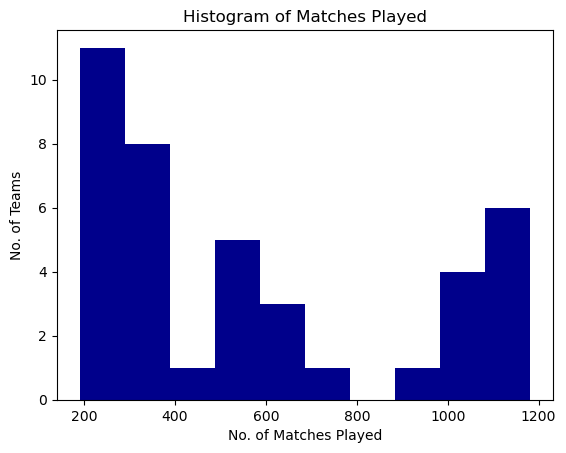

In [33]:
# Let us visualize each column

# First let us start with Matches Played column
# plot histogram
plt.hist(df['Matches Played'],color='darkblue')

# Add labels and title
plt.xlabel('No. of Matches Played')
plt.ylabel('No. of Teams')
plt.title('Histogram of Matches Played')

So, We clearly see that most of the clubs are inexperienced, that is, they played less than 400 matches in the Premier League. Well, However, There are few other clubs who are well experienced and have played more than 900 matches in the league.

But, However, It is important to consider that the some of the clubs are already been taken by the competitors. The firm is willing to invest in the club irrespective of the experience of the club because they want to invest in potential clubs who can perform well in future tournaments.

In [31]:
# Let's drop the clubs which played more than 900 and reset the index
df = df[df['Matches Played'] < 900].reset_index(drop=True)
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023


We have dropped the Clubs which have played more than 900 matches and resetted the index for the remaining Clubs in our Dataframe.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            29 non-null     object 
 1   Matches Played  29 non-null     int64  
 2   Win             29 non-null     int64  
 3   Loss            29 non-null     int64  
 4   Drawn           29 non-null     int64  
 5   Goals           29 non-null     int64  
 6   Clean Sheets    29 non-null     int64  
 7   TeamLaunch      29 non-null     object 
 8   Winners         29 non-null     float64
 9   Runners-up      29 non-null     Int64  
 10  lastplayed_pl   29 non-null     object 
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 2.6+ KB


If we want to consider **Win, Loss, Drawn and Clean sheet** columns, we need to make it fair to compare between the clubs since it the number of matches played varies from one club to another.

To make it even, we will calculate **Winning rate, Loosing rate, Drawn rate and Clean sheet rate** to use it for further analysis.

In [33]:
# Create new columns for Winning Rate, Loss Rate, Drawn Rate, & Clean Sheet Rate

df['Winning Rate'] = (df['Win'] / df['Matches Played'])*100
df['Loss Rate'] = (df['Loss'] / df['Matches Played'])*100
df['Drawn Rate'] = (df['Drawn'] / df['Matches Played'])*100
df['Clean Sheet Rate'] = (df['Clean Sheets'] / df['Matches Played'])*100

# Create a column for average goals scored per match and round it to a whole number

df['Avg Goals Per Match']=df['Goals']/df['Matches Played']
df['Avg Goals Per Match']=df['Avg Goals Per Match'].round()

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Hurray!!The new columns are added to the data frame.

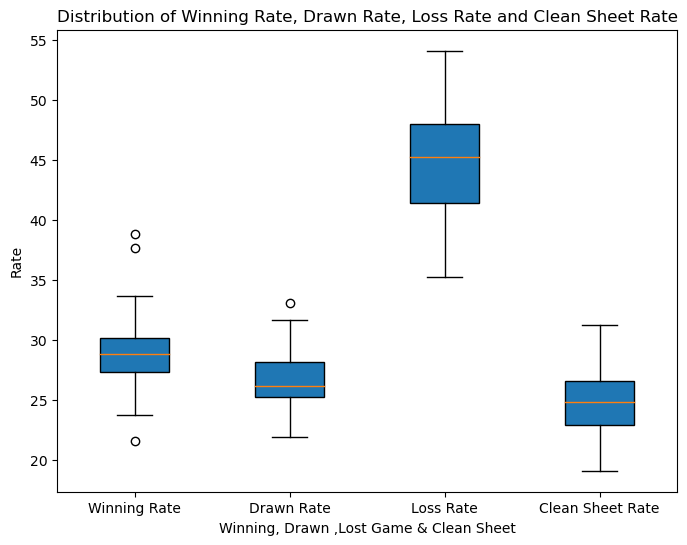

In [34]:
# Now let us visualize Winning, Loss, Drawn rate, and Clean Sheet

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
boxplot = plt.boxplot([df['Winning Rate'], df['Drawn Rate'], df['Loss Rate'], df['Clean Sheet Rate']], 
                      patch_artist=True,
                      labels=['Winning Rate', 'Drawn Rate', 'Loss Rate', 'Clean Sheet Rate'])

# Set the title and axis labels
plt.title('Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate')
plt.xlabel('Winning, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')

# Show the plot
plt.show()

**Winning Rate**

We observe that there are a few outliers in the Winning Rate boxplot, which are located above the upper whisker. It is safe to conclude that these outlier clubs have shown exceptional winning rates compared to the other clubs.

Let us identify the club that has highest and lowest "Winning Rate".

**Drawn Rate**

We observe an outlier in the drawn rate boxplot, indicating that there is one clubs has a much higher drawn rate compared to others. This may not necessarily be a positive indication, as it suggests that the club may struggle to secure wins in their matches.

Let us identify which club is this.

**Loss Rate**

We can see very clearly that loss rates for these clubs are high compared to winning rate.

**Clean Sheet Rate**

We see that data for Clean Sheet rate is pretty symmetric.

In [35]:
# Winning Rate further analysis. Identify clubs with high winning rate

# Calculate the interquartile range for the "Winning Rate" column
Q1 = df['Winning Rate'].quantile(0.25)
Q3 = df['Winning Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
HighWinningRate_CLubs = df[(df['Winning Rate'] > upper_bound)]
HighWinningRate_CLubs

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


We can clearly see that, **Blackburn Rovers** and **Leeds united** are having a exceptional winning rate of 38% and 39% respectively.

In [36]:
# Winning Rate further analysis. Identify club with low winning rate

# Calculate the lower boundaries for potential outliers <-- Low winning rate compared to other teams
lower_bound = Q1 - 1.5 * IQR

# Identify the clubs with lowest winning rate 
lowwinningrate = df[(df['Winning Rate'] < lower_bound)]
lowwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


And here, **Hull city** is with the lowest winning rate of 21%.

In [37]:
# Drawn Rate further analysis. Identify club with high drawn rate
# Calculate the interquartile range for the "Drawn Rate" column
Q1 = df['Drawn Rate'].quantile(0.25)
Q3 = df['Drawn Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
highwinningrate = df[(df['Drawn Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


With the drawn rate of 27%, **Brighton & Hove Albion** are exceptional.

In [38]:
# Now let us explore 'Avg Goals Per Match' column

df['Avg Goals Per Match'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals Per Match, dtype: float64

There is no much useful insights from this field, So we wont be using it for further analysis.

In [39]:
# Let us explore columns 'Winners' and 'Runners-up'

df['Winners'].value_counts()

Winners
0.0    27
1.0     2
Name: count, dtype: int64

In [40]:
df['Runners-up'].value_counts()

Runners-up
0    28
1     1
Name: count, dtype: Int64

Ohh!! We clearly see that there are only 2 clubs who won the tournament 2 once and only 1 club that stood that runner-up once. Let's check who those are.

In [41]:
df[(df['Winners']==1) | (df['Runners-up']==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


**Blackburn Rovers** have won Premier League once and been an Runners-up once and **Leicester City** has won Premier League once.

In [42]:
# Lets us again analyse Matches Played Column for our reduced dataframe (29 clubs).

df['Matches Played'].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

So, the average matches played by the clubs is **372**.

In [43]:
# Let us look at "lastplayed_pl" column
df['lastplayed_pl'].value_counts()

lastplayed_pl
2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: count, dtype: int64

Out of the total 29 teams, eight are currently playing in the Premier League. Since these teams are currently active in the league, it makes sense to prioritize them in our analysis. However, there are also teams that date back as early as 2000. It may be appropriate to assign these teams less weight.

In [48]:
# Let us check the eight teams that are currently playing in the Premier League

df[df['lastplayed_pl']=='2023']['Club']

3                 Bournemouth
4      Brighton & Hove Albion
8              Crystal Palace
10                     Fulham
12               Leeds United
13             Leicester City
16          Nottingham Forest
27    Wolverhampton Wanderers
Name: Club, dtype: object

Giving more priority to teams that have **more recent experience** playing in the Premier League is ideal. When making the final decision, we will assign higher weight to teams that have played more recently, and lesser weight to those that have not played recently.

### Observations

* **Blackburn Rovers and Leeds united** are having a exceptional winning rate.
* **Hull city** is with the lowest winning rate.
* **Brighton & Hove Albion** are exceptional in Drawn rate.
* **Blackburn Rovers** have won Premier League once and been an Runners-up once.
* **Leicester City** has won Premier League once.
* The average matches played by the clubs is **372**.
* **8** are currently playing in the Premier League.

## Final Recommendations Framework

Let's create a plan to Score each team on the pre defined metric.

* Give a score of **10** if club have a relatively high experience in the Premier League **above average (372)**
* Give a score of **15** if club has **winning rate** above Q3
* Give a score of **15** if club has **lossing rate** below Q1
* Give a score of **10** if club **drawn rate** below Q1 and **losing rate** is below Q1
* Give a score of **10** if club has **clean sheet** above Q3 and **winning rate** is above Q3
* Give a score of **15** if club has **won** premier league
* Give a score of **10** if club has been a **runners-up** in premier league
* Give a score of **15** if club has been **currently playing** in premier league

In [49]:
# Calculate the upper bound for the "Winning Rate" column
upper_bound_WinningRate = df['Winning Rate'].quantile(0.75)

# Calculate the lower bound for the "Loss Rate" column
lower_bound_LosingRate = df['Loss Rate'].quantile(0.25)

# Calculate the lower bound for the "Drawn Rate" column
lower_bound_DrawnRate = df['Drawn Rate'].quantile(0.25)

# Calculate the upper bound for the "Clean Sheet Rate" column
upper_bound_CleanSheetRate = df['Clean Sheet Rate'].quantile(0.75)

In [50]:
# Let's find the length of our updated DataFrame
len(df)

29

In [51]:
# Create a column to calculate the score wrt the length of the updated DataFrame
df['scores']=np.zeros(len(df))
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [52]:
df.loc[df['Matches Played'] >= 372, 'scores'] += 10
df.loc[df['Winning Rate'] >= upper_bound_WinningRate, 'scores'] += 15
df.loc[df['Loss Rate'] <= lower_bound_LosingRate, 'scores'] += 15
df.loc[(df['Drawn Rate'] <= lower_bound_DrawnRate) & (df['Loss Rate'] <= lower_bound_LosingRate), 'scores'] += 10
df.loc[(df['Clean Sheet Rate'] >= upper_bound_CleanSheetRate) & (df['Winning Rate'] >= upper_bound_WinningRate), 'scores'] += 10
df.loc[df['Winners'] == 1, 'scores'] += 15
df.loc[df['Runners-up'] == 1, 'scores'] += 10
df.loc[df['lastplayed_pl'] == 2023, 'scores'] += 15

In [53]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,75.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,25.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,15.0


A Visualisation might helps us to understand the analysis in a better way. Let's do that.

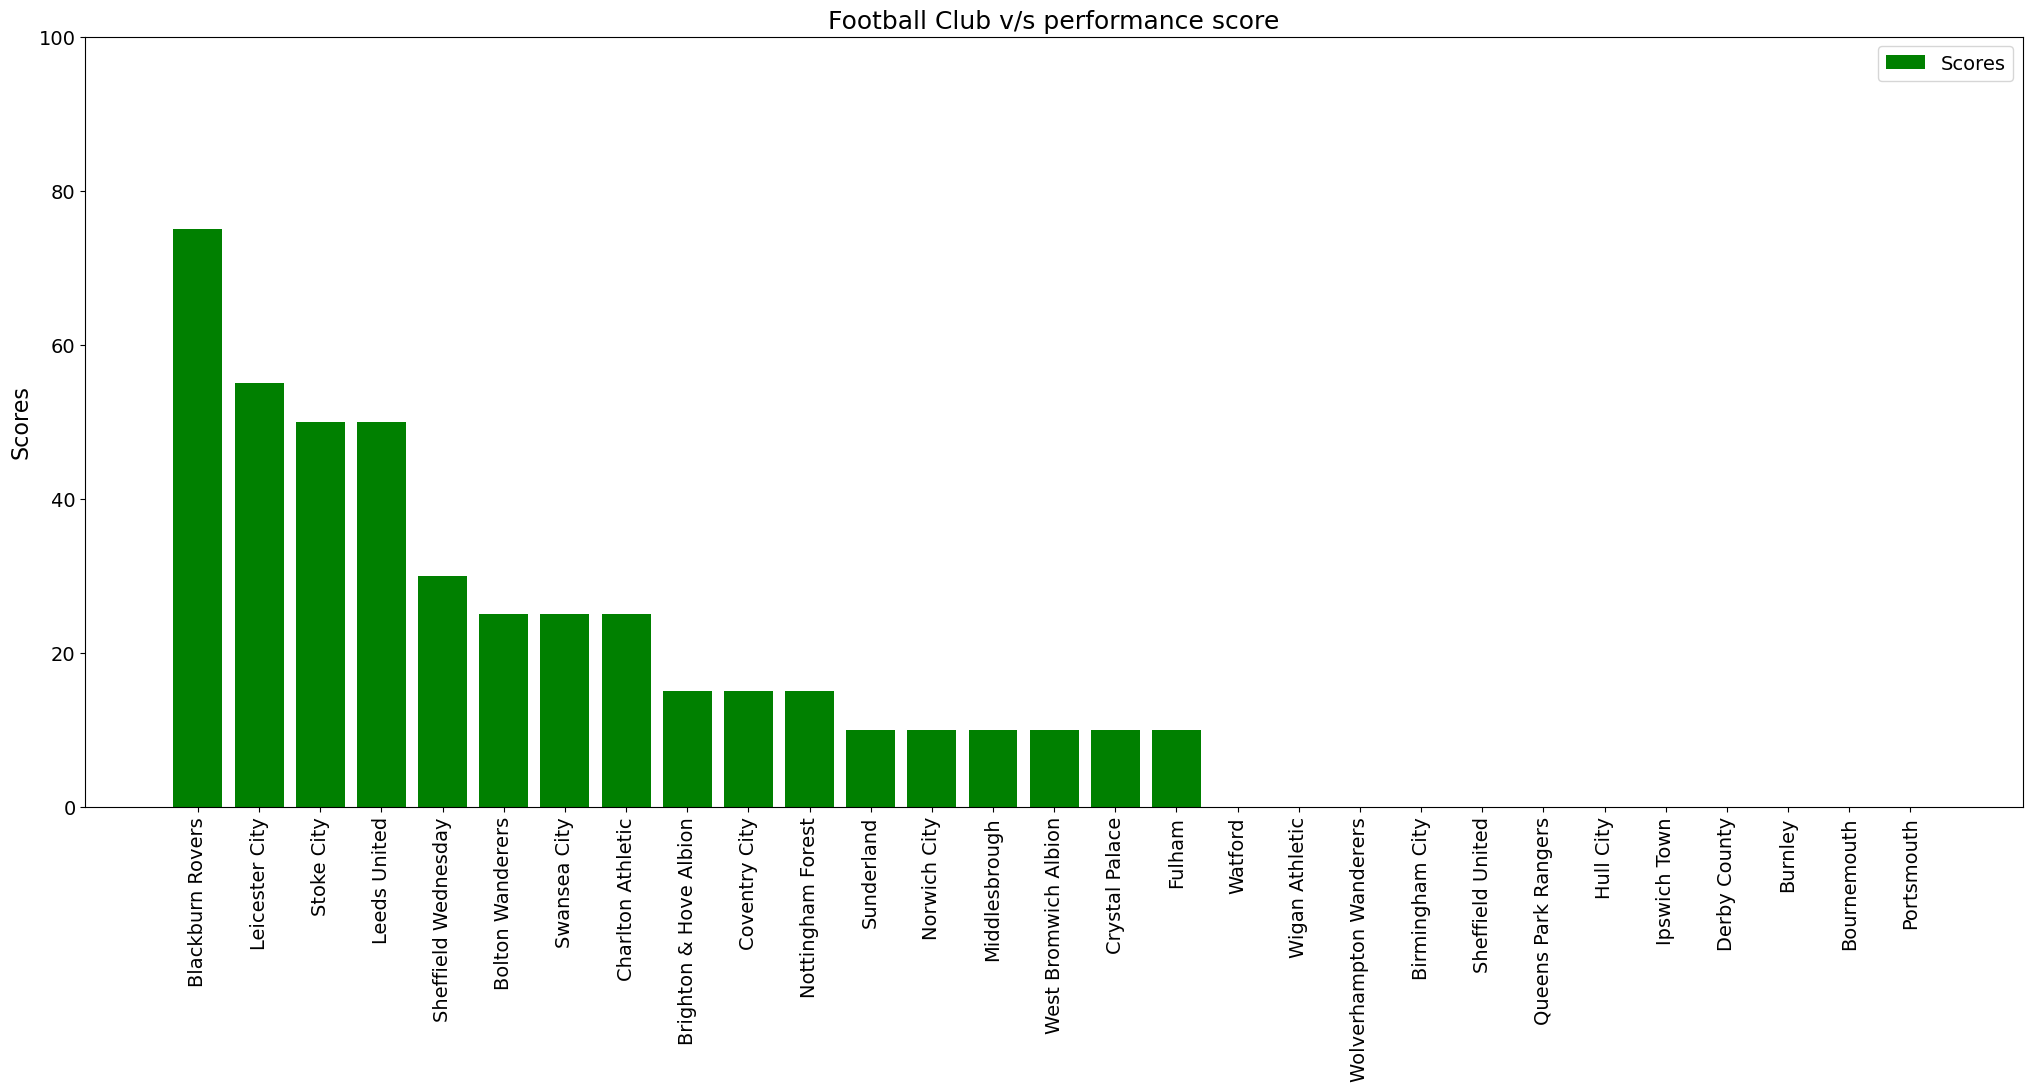

In [54]:
# sort the DataFrame by score in descending order
df_sort = df.sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='green')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

Based on the above chart, **Blackburn Rovers** has the highest score basis our analysis and next best **Leicester City**

To ensure a thorough evaluation of football club performance we must consider clubs current form.

Let us check the score of those clubs that have played in the last three years. Specifically, suggest including clubs that have played in 2023, as well as those that last played in 2022 and 2021.

This approach allows us to pinpoint those clubs that are currently in good form and have consistently performed well over the past few years.

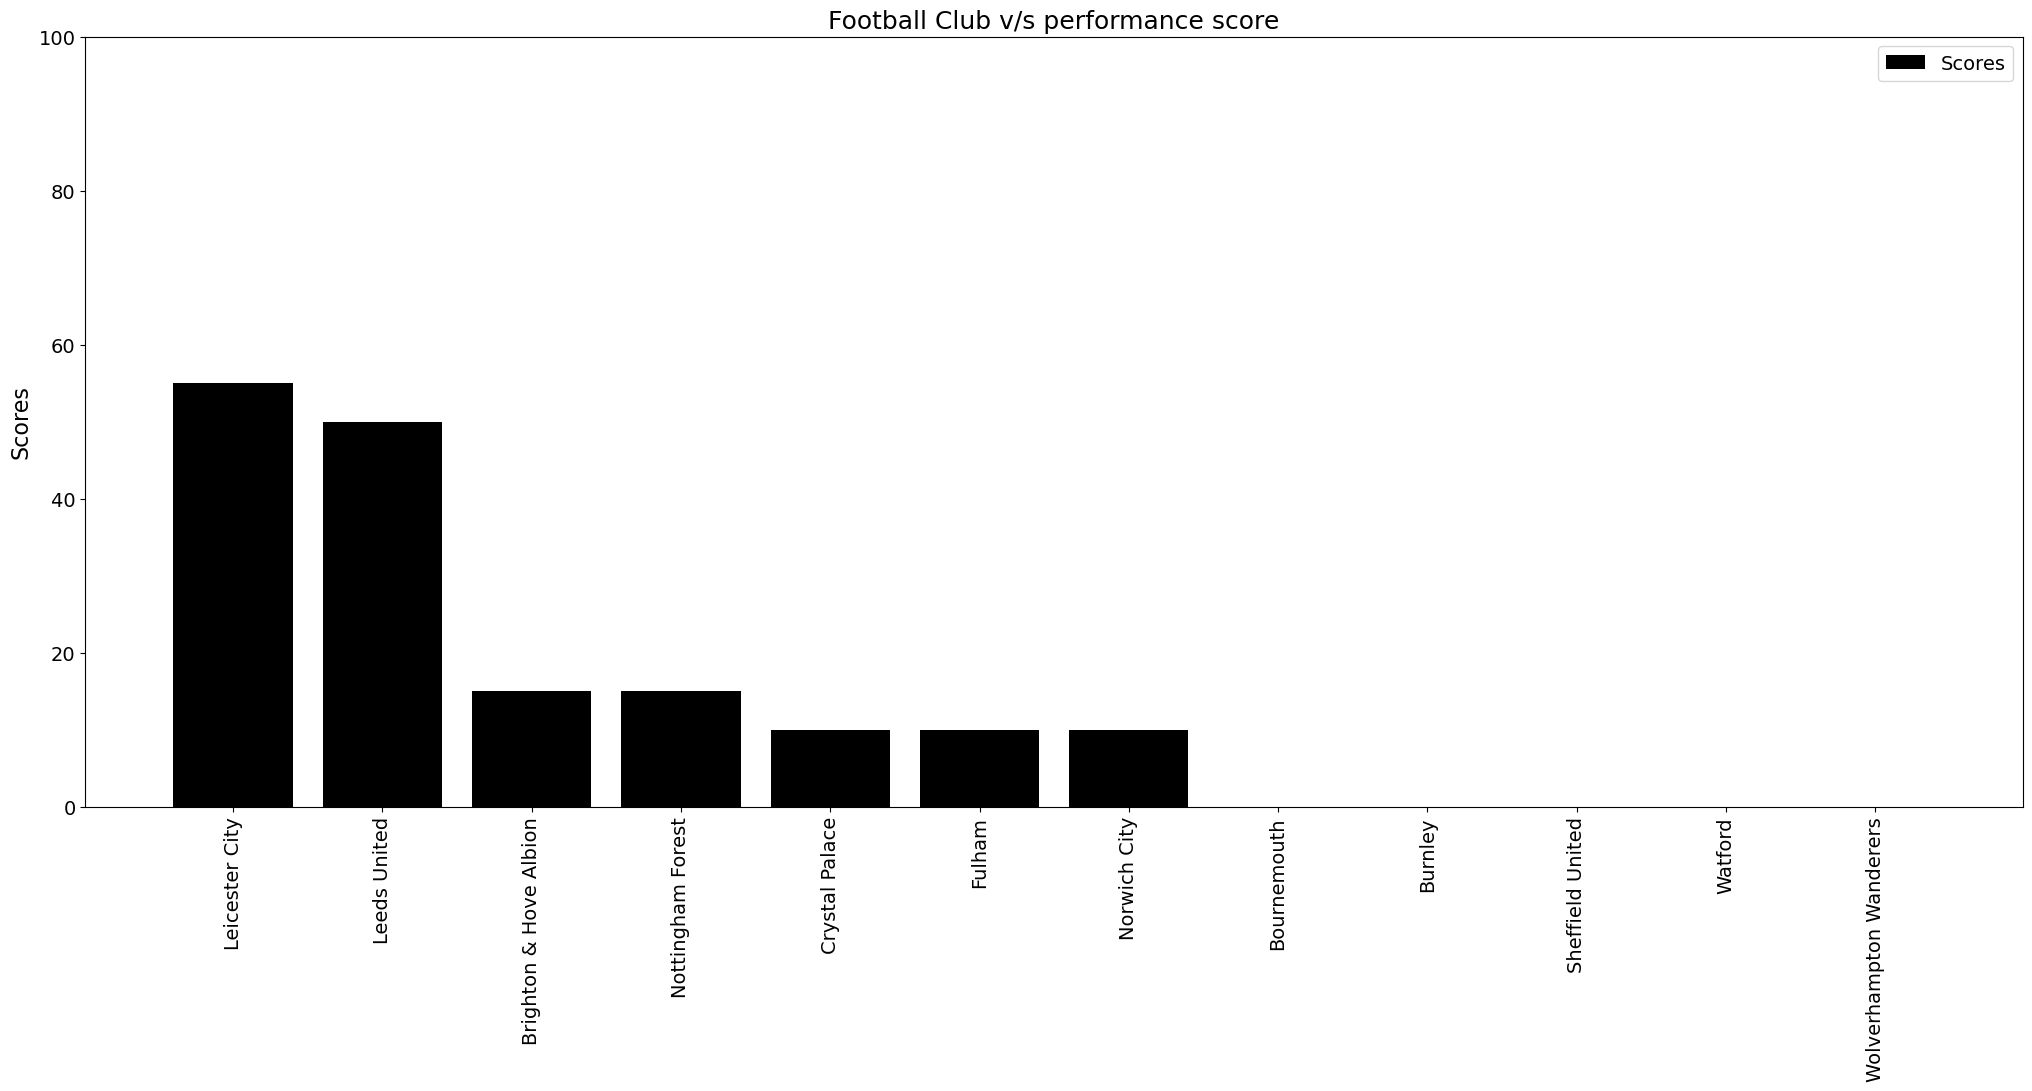

In [56]:
# sort the DataFrame by score in descending order
df_sort = df[(df['lastplayed_pl']=='2023') | (df['lastplayed_pl']=='2022') | (df['lastplayed_pl']=='2021')].sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='black')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

Upon closer examination of the list, we can observe that our current leader, **Blackburn Rovers, is not included**. To gain a better understanding of their performance, it's necessary to investigate further and determine the last year in which Blackburn Rovers played. This information will provide crucial context to our analysis and enable us to assess their recent form accurately.

In [57]:
df[df['Club']=='Blackburn Rovers']['lastplayed_pl']

1    2012
Name: lastplayed_pl, dtype: object

## Conclusion
Blackburn Rovers last played in the tournament in **2012**, which was quite some time ago. Given this information, we recommend that stakeholders consider investing in **Leicester City instead**. We believe that Leicester City's recent form and performance make them a better choice for investment.

To support our claim, we will conduct further secondary research to provide additional evidence of Leicester City's current form and potential for success.

According to our research, Blackburn Rovers were relegated to the Championship league in 2012 i.e., league below Premier League and later to League One in 2017 i.e., league below Championship league. However, they were promoted back to the Championship in 2018 and have since finished in the middle of the table in recent years. Given their inconsistent performance and lack of presence in the Premier League since 2012, it would be inappropriate to recommend this club for investment.

On the other hand, Leicester City, the 2016 Premier League champions, have consistently finished in the top 10 in recent years. They placed 5th in both the 2019-2020 and 2020-2021 seasons and finished 8th in 2021-2022. With sufficient **financial backing, Leicester City has the potential to achieve even greater success in the near future**.

Therefore, it would be reasonable to recommend **Leicester City** to our clients.

### Sources
 Source 1: https://www.transfermarkt.co.in/blackburn-rovers/platzierungen/verein/164
 
 Source 2:https://www.transfermarkt.co.in/leicester-city/platzierungen/verein/1003

## We recommend investing in LEICESTER CITY based on our analysis!

## Thank you!!

#### -Komalika Kunapareddy